# A1 - Python

This assignment will cover some questions related to topics of data types, attribute types, exploratory data analysis, and data preprocessing. The assignment will also serve as a further introduction to using a high-level language for analysis (e.g., R, Python).

Make sure that you keep this notebook named as "a1.ipynb" 

Submit the zip-file created after running your notebook on the Linux lab machines. 

Your answers must be computer generated (including text and diagrams). Your final document submission should include text responses to questions and description of your efforts, tables, R/Python code used to calculate answers, and figures.

Any other packages or tools, outside those listed in the assignments or Canvas, should be cleared
by Dr. Brown before use in your submission.




## Q0 - Setup

The following code looks to see whether your notebook is run on Gradescope (GS), Colab (COLAB), or the linux Python environment you were asked to setup.

In [188]:
import re 
import os
import platform 
import sys 

# flag if notebook is running on Gradescope 
if re.search(r'amzn', platform.uname().release): 
    GS = True
else: 
    GS = False

# flag if notebook is running on Colaboratory 
try:
  import google.colab
  COLAB = True
except:
  COLAB = False

# flag if running on Linux lab machines. 
cname = platform.uname().node
if re.search(r'(guardian|colossus|c28)', cname):
    LLM = True 
else: 
    LLM = False

print("System: GS - %s, COLAB - %s, LLM - %s" % (GS, COLAB, LLM))

System: GS - False, COLAB - False, LLM - True


### Notebook Setup 

It is good practice to list all imports needed at the top of the notebook. You can import modules in later cells as needed, but listing them at the top clearly shows all which are needed to be available / installed.

If you are doing development on Colab, the otter-grader package is not available, so you will need to install it with pip (uncomment the cell directly below).

In [189]:
# Only uncomment if you developing on Colab 
# if COLAB == True: 
#     print("Installing otter:")
#     !pip install otter-grader==4.2.0 

In [190]:
# Import standard DS packages 
import pandas as pd 
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline 

# Packages useful for Q4
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# Package for Autograder 
import otter 
grader = otter.Notebook()

In [191]:
grader.check("q0")

q0 results: All test cases passed!

## Q1 - Census Data 

Consider the [Census Income data set](http://archive.ics.uci.edu/ml/datasets/Census+Income) available at the [UCI ML archive](http://archive.ics.uci.edu/ml/index.php). Specifically, you will be interested in the `adult.data` file which contains the data and `adult.names` files which contains documentation about the data.

You should explore the files a bit in a text editor to understand the format. Then load the data for you analysis, the first samples of the data set should be:

```
39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family,
        White, Male, 2174, 0, 40, United-States, <=50K
```

You attributes should be named: 
```
"age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
```

### Q1a - Load Data 

Load in the data directly from the UCI website into a Pandas Data Frame. 
Make sure to recognize any missing values when the data is read in. 

In [192]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
colnames = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
          "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
          "hours_per_week", "native_country", "income"] 
adult = pd.read_csv(url, names=colnames, sep=", ", na_values='?')  

adult.head()

/home/campus24/dobidov/.conda/envs/cs4821/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [193]:
grader.check("q1a")

q1a results: All test cases passed!

<!-- BEGIN QUESTION -->

### Q1b - Variable Definitions

For each variable (column of the data set) excluding the final class/target variable (last column), write a clear 1-sentence description of what the variable is, i.e., what information does it describe and how is it defined or collected.  Then, state the attribute type: *nominal*, *ordinal*, *interval*, or *ratio*. 

To answer this question, you may have to do a bit of reading and research into this data set. If you can not find a clear explanation of what a variable is and how it is defined say so.

For example, the variable `age` could be described as, “Age is the age of an individual as reported by that person for the 1990 census; the value is reported in integer units of years.”

Refer to each variables by the column name.

**YOUR ANSWERS**

* **age** - “Age is the age of an individual as reported by that person for the 1994 census; the value is reported in integer units of years.” - *Ratio*
* **workclass** - “The type of work an individual was engaged in as reported by that person for the 1994 census; reported as a categorical variable with 8 levels (e.g. private, self-emp-inc, federal-gov, etc.)” - *Nominal*
* **fnlwgt"** - “Weight assigned to each individual in the sample to make the sample representative of the entire population” - *Ratio*
* **education"** - “The highest level of education of an individual as reported by that person for the 1994 census; reported as a categorical variable with 16 levels (e.g. bachelors, some-college, 11th, etc.)” - *Ordinal*
* **education_num"** - “The numerical representation of the highest level of education of an individual as reported by that person for the 1994 census; reported as a discrete numerical variable” - *Interval*
* **marital_status"** - “The marital status of an individual as reported by that person for the 1994 census; reported as a categorical variable with 7 levels (e.g. divorced, never-married, separated, etc.)” - *Nominal*
* **occupation"** - “The type of job of an individual as reported by that person for the 1994 census; reported as a categorical variable with 14 levels (e.g. tech-support, craft-repair, other-service, etc.)” - *Nominal*
* **relationship"** - “The status of an individual in the household as reported by that person for the 1994 census; reported as a categorical variable with 6 levels (e.g. wife, own-child, husband, etc.)” - *Nominal*
* **race"** - “The racial group an individual identified with as reported by that person for the 1994 census; reported as a categorical variable with 5 levels (e.g. white, other, black, etc.)” - *Nominal*
* **sex"** - “The gender of an individual as reported by that person for the 1994 census; reported as a binary categorical variable (female, male)” - *Nominal*
* **capital_gain"** - “Financial gain experienced by an individual from the sale of capital assets (e.g. real estate, stocks, patents, etc.) as reported by that person for the 1994 census; the value is reported in integer units of US dollars.” - *Ratio*
* **capital_loss"** - “Financial loss experienced by an individual from the sale of capital assets (e.g. real estate, stocks, patents, etc.) as reported by that person for the 1994 census; the value is reported in integer units of US dollars.” - *Ratio*
* **hours_per_week"** - “The number of hours an individual worked per week as reported by that person for the 1994 census; the value is reported in integer units of hours.” - *Ratio*
* **native_country"** - “The country of origin of an individual as reported by that person for the 1994 census; reported as a categorical variable with 41 levels (e.g. United-States, Cambodia, England, etc.)” - *Nominal*
* **income"** - “The annual income of an individual as reported by that person for the 1994 census; the value is reported as a binary categorical variable (>50K, <=50K).” - *Ordinal*

<!-- END QUESTION -->

### Q1c - Missing Variables 

There are missing data.  
i. (2 points) What is the symbol or symbols used to indicate missing values?


Missing values are encoded with **"?"**

ii. (7 points) For each variable, calculate and report the percentage of missing data for that variable (percentage of rows).

In [194]:
# Create a Data.Series that has the percentage of missing data for each 
#  attribute in the data set.
miss_data = 100*adult.isna().mean().round(4)

miss_data

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education_num     0.00
marital_status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital_gain      0.00
capital_loss      0.00
hours_per_week    0.00
native_country    1.79
income            0.00
dtype: float64

In [195]:
grader.check("q1c")

q1c results: All test cases passed!

## Q2 - Data Preprocessing 

You are asked to write two functions `minmaxNorm` and `zscoreNorm` to perform normalization on passed in data. Do not just use preprocessing or normalization functions available in R or Python.

The function `minmaxNorm` should take four arguments
* `trData` - the training data (use to establish the data properties for normalization)
* `teData` - the testing data, (if supplied default: None), to also be normalized according the the same data properties
* `minV` - minimum value of new range (default: 0)
* `maxV` - maximum value of new range (default: 1)

The function `zscoreNorm` should take three arguments
* `trData` - the training data (use to establish the data properties for normalization)
* `teData` - the testing data, (if supplied default: None), to also be normalized according the the same data properties
* `madFlag` - boolean flag, if positive, use mean abs. deviation instead of standard deviation. (default: False)

For many of our tasks, the data is split into subsets (by sample) of training and testing data (see slides: 03.classify.part2). The training data is used to estimate the parameters needed in the transformation: for `zscoreNorm`, μ - mean and σ - standard deviation for each attribute; for `minmaxNorm`, min and max values for each attribute.

Both the training and testing data (if passed in) are to be transformed using the parameters from the training data and passed into the function. If the input is 2D a matrix/data frame/etc., then be sure to scale each feature (column) separately.

In R, the functions should work on vectors, matrices (1D and 2D) and data frames.

In Python, the functions should work on lists, np.arrays (1D and 2D), and data frames (see sample inputs below). 

The functions should return a tuple-Python of the transformed training data and transformed testing data.  In Python, each item of the tuple should be a numpy array.  If no test data is included as input return None for this item of the tuple. 

A few example test cases are supplied with more tested.

*Hint:* 
I suggest taking the input training/testing data and converting to the same type, e.g., numpy arrays.  Then, do the normalization calculations on this single type of data object.  


In [196]:
def minmaxNorm(trData, teData=None, minV=0, maxV=1):
    # Perform min-max normalization on trData and teData
    # return a tuple of the transformed data
    trData, teData = np.array(trData), np.array(teData)
    trMax, trMin = trData.max(axis=0), trData.min(axis=0)
    
    trDataNorm = ((trData-trMin)/(trMax-trMin))*(maxV-minV)+minV
    if teData.any():
        teDataNorm = ((teData-trMin)/(trMax-trMin))*(maxV-minV)+minV
    return (trDataNorm, teDataNorm) if teData.any() else (trDataNorm, None)

in1 = [0, 1, 2, 5]
out1 = minmaxNorm(in1, None)
print(out1)

in2 = np.array([0, 1, 2, 4, 8])
out2 = minmaxNorm(in2, None, -1, 1)
print(out2)

in3 = np.array([[1, 3, 4, 5], [2, 6, 5, 8], [3, 4, 6, 9]])
in3test = np.array([2.5, 5, 4, 7])
out3 = minmaxNorm(in3, in3test, -1, 1)
print(out3)

in4 = pd.DataFrame([[1, 3, 4, 5], [2, 6, 5, 8],
                    [3, 4, 6, 9]])
out4 = minmaxNorm(in4, in3test, 0, 10)
print(out4)

(array([0. , 0.2, 0.4, 1. ]), None)
(array([-1.  , -0.75, -0.5 ,  0.  ,  1.  ]), None)
(array([[-1.        , -1.        , -1.        , -1.        ],
       [ 0.        ,  1.        ,  0.        ,  0.5       ],
       [ 1.        , -0.33333333,  1.        ,  1.        ]]), array([ 0.5       ,  0.33333333, -1.        ,  0.        ]))
(array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 5.        , 10.        ,  5.        ,  7.5       ],
       [10.        ,  3.33333333, 10.        , 10.        ]]), array([7.5       , 6.66666667, 0.        , 5.        ]))


In [197]:
def zscoreNorm(trData, teData=None, madFlag=0):
    # Perform Gaussian normalization on trData and teData
    # return a tuple of the transformed data
    trData, teData = np.array(trData), np.array(teData)
    trMean = trData.mean(axis=0)
    if madFlag == 0:
        denom = trData.std(axis=0)
    else:
        denom = np.mean(np.abs(trData - trMean), axis=0)
    
    trDataNorm = (trData-trMean)/denom
    if teData.any():
        teDataNorm = (teData-trMean)/denom
    return (trDataNorm, teDataNorm) if teData.any() else (trDataNorm, None)

In [198]:
grader.check("q2")

q2 results: All test cases passed!

## Q3 - Data Preprocessing

Let's now compare the normalization functions that you wrote above to using the normalization functions that are available in standard libraries: 

* Python: `MinMaxScaler` and `StandardScaler` or scale in `sklearn.preprocessing`
* R: `scale` and `preProcess`, `predict` from `caret`

In [199]:
# test data 
q3in = pd.DataFrame({'x': [20, 37, 40, 60, 85, 120], 'y': [-10, -8, 52, 3, 18, 23]})

q3outA = minmaxNorm(q3in, None)
print(q3outA)

q3outB = zscoreNorm(q3in, None)
print(q3outB)

# use MinMaxScaler with default range parameters
scaler = preprocessing.MinMaxScaler()
q3outC = scaler.fit_transform(q3in)
print(q3outC)

# use StandardScaler
scaler = preprocessing.StandardScaler()
q3outD = scaler.fit_transform(q3in)
print(q3outD)

(array([[0.        , 0.        ],
       [0.17      , 0.03225806],
       [0.2       , 1.        ],
       [0.4       , 0.20967742],
       [0.65      , 0.4516129 ],
       [1.        , 0.53225806]]), None)
(array([[-1.20221086, -1.08103207],
       [-0.69549389, -0.98702928],
       [-0.60607324,  1.83305438],
       [-0.00993563, -0.47001394],
       [ 0.7352364 ,  0.23500697],
       [ 1.77847723,  0.47001394]]), None)
[[0.         0.        ]
 [0.17       0.03225806]
 [0.2        1.        ]
 [0.4        0.20967742]
 [0.65       0.4516129 ]
 [1.         0.53225806]]
[[-1.20221086 -1.08103207]
 [-0.69549389 -0.98702928]
 [-0.60607324  1.83305438]
 [-0.00993563 -0.47001394]
 [ 0.7352364   0.23500697]
 [ 1.77847723  0.47001394]]


In [200]:
grader.check("q3")

q3 results: All test cases passed!

## Q4 - Data Distances 

Consider the following training data set of with 5 samples and 3 variables:

|  | A | B | C | 
|--|---|---|---|
| x1 | 1.4 | 1.3 | 2.9 |
| x2 | 1.8 | 1.1 | 3.2 | 
| x3 | 1.3 | 1.2 | 2.8 | 
| x4 | 0.8 | 3.3 | 3.1 | 
| x5 | 1.5 | 2.1 | 3.3 |

You have a new test data point x = (1.25, 1.74, 3.01).

### Distance functions 

Calculate and present the distance between the new data point and each of the points in the data set using:
* Manhattan distance, 
* Euclidean distance, 
* Minkowski distance (λ = 3), 
* supremum distance, and 
* cosine similarity (that is, 1 - cos value).

Present the results in a DataFrame, `dists`, with the rows for each data point and columns for each distance measure.

In [201]:
q4dat = np.array([[1.4, 1.3, 2.9], [1.8, 1.1, 3.2], [1.3, 1.2, 2.8],
                [0.8, 3.3, 3.1], [1.5, 2.1, 3.3]])
q4x = np.array([[1.25,1.74,3.01]])

dists = pd.DataFrame(index=range(0,5), columns=['L1', 'L2', 'L3', 'Linf', 'Cos'])
dists.index = ["x1", "x2", "x3", "x4", "x5"]

# Fill in values of dists Data Frame 
# Suggest using scipy's pdist and squareform function 
# try to avoid looping through the data and instead use matrix operations

dists['L1'] = pdist(np.concatenate((q4x, q4dat), axis=0), metric='cityblock')[:q4dat.shape[0]]
dists['L2'] = pdist(np.concatenate((q4x, q4dat), axis=0), metric='euclidean')[:q4dat.shape[0]]
dists['L3'] = pdist(np.concatenate((q4x, q4dat), axis=0), metric='minkowski')[:q4dat.shape[0]]
dists['Linf'] = pdist(np.concatenate((q4x, q4dat), axis=0), metric='chebyshev')[:q4dat.shape[0]]
dists['Cos'] = 1 - pdist(np.concatenate((q4x, q4dat), axis=0), metric='cosine')[:q4dat.shape[0]]

dists

,L1,L2,L3,Linf,Cos
x1,0.70,0.477703,0.477703,0.44,0.993025
x2,1.38,0.864986,0.864986,0.64,0.974255
x3,0.80,0.581550,0.581550,0.54,0.992160
x4,2.10,1.626100,1.626100,1.56,0.946183
x5,0.90,0.525547,0.525547,0.36,0.998982


In [202]:
grader.check("q4")

q4 results: All test cases passed!

## Q5 - Exploratory Data Analysis 

We will explore aspects of the census data from above. 

**Update!** For each part of the question below, make sure the figure is of reasonable size and can be viewed in the PDF document generated.  You may want to consider using the `figsize` parameter in matplotlib.  


<!-- BEGIN QUESTION -->

### Q5a - Visualize: Amounts: Single Variable

Create a bar plot of `Education`. 

Use good visualization practices as discussed in class and in the [Visualization book reference](https://clauswilke.com/dataviz/). 
Make sure to label everything. 

Depending on what story we want to tell, we might want to adjust our visualization

I will create 3 plots:

1. Bar plot with the descending highest education count - Easy to see which highest education was the most popular among the respondents.
2. Bar plot with the natural order of highest education - Easy to see the natural progression of highest education count among the respondents.
3. Bar plot with the natural order of highest education with outliers ('Assos-voc','Assoc-acdm','Prof-school') removed (or combined with other levels) - The same as #2, but easier to focus on the main trend.

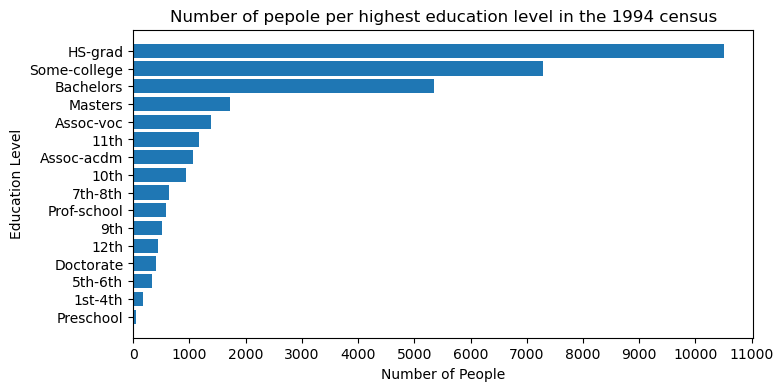

In [203]:
# Create bar plot of education in the descending order
# set the plot size
plt.figure(figsize=(8, 4))

# count the number of occurrences of each level
count = adult['education'].value_counts()

# sort the count in descending order
count = count.sort_values(ascending=True)

# plot the horizontal bar plot
plt.barh(count.index, count.values)

# add labels and title
plt.xlabel('Number of People')
plt.ylabel('Education Level')
plt.title('Number of pepole per highest education level in the 1994 census')

# set the x-axis tick labels
plt.xticks(range(0,12000,1000))

plt.show()

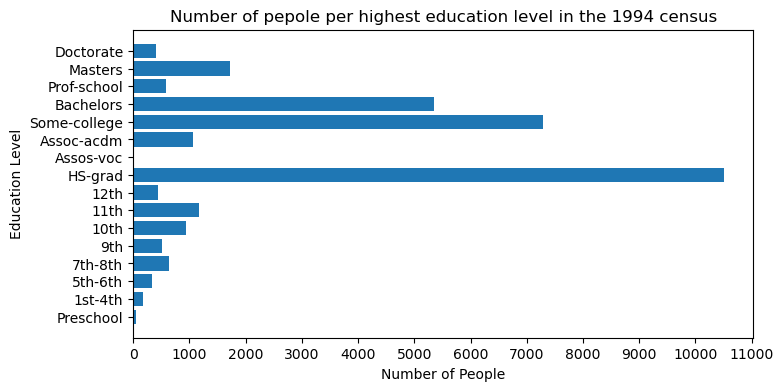

In [204]:
# Create bar plot of education in the natural order
# set the plot size
plt.figure(figsize=(8, 4))

# count the number of occurrences of each level
count = adult['education'].value_counts()

# reorder the count
order = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Assos-voc',
         'Assoc-acdm','Some-college','Bachelors','Prof-school','Masters','Doctorate']
count = count.reindex(order)

# plot the horizontal bar plot
plt.barh(count.index, count.values)

# add labels and title
plt.xlabel('Number of People')
plt.ylabel('Education Level')
plt.title('Number of pepole per highest education level in the 1994 census')

# set the x-axis tick labels
plt.xticks(range(0,12000,1000))

plt.show()

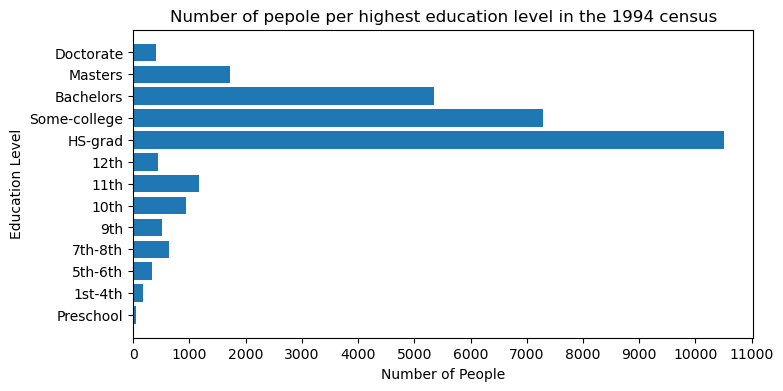

In [205]:
# Create bar plot of education in the natural order with the outlier labels removed
# set the plot size
plt.figure(figsize=(8, 4))

# count the number of occurrences of each level
count = adult['education'].value_counts()

# reorder the count
order = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad',
         'Some-college','Bachelors','Masters','Doctorate']
count = count.reindex(order)

# plot the horizontal bar plot
plt.barh(count.index, count.values)

# add labels and title
plt.xlabel('Number of People')
plt.ylabel('Education Level')
plt.title('Number of pepole per highest education level in the 1994 census')

# set the x-axis tick labels
plt.xticks(range(0,12000,1000))

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q5b: Visualize: Amounts: Multiple Variables

Create a grouped bar plot of `Marital Status` with `sex`.

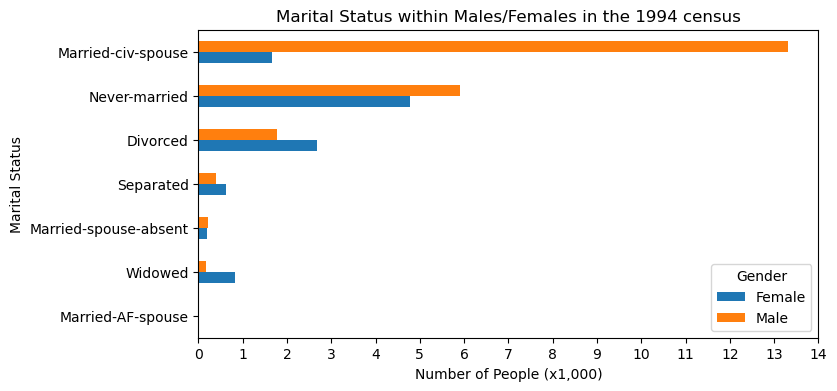

In [206]:
# Create plot

# pivot the data frame
pivot = adult.pivot_table(index='marital_status', columns='sex', aggfunc='size', fill_value=0)

# sort by total count
pivoted = pivoted.sort_values(by=['Male', 'Female'], ascending=True)

# plot the grouped bar plot
pivoted.plot(kind='barh', stacked=False, figsize=(8,4))

# set x-axis and y-axis labels
plt.xlabel('Number of People (x1,000)')
plt.ylabel('Marital Status')

# set the title
plt.title('Marital Status within Males/Females in the 1994 census')

# set the legend
plt.legend(title='Gender')

# set the x-axis tick labels
plt.xticks(range(0,15000,1000), range(0,15,1))

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q5c - Visualize: Distribution: Single Attribute

Generate a histogram with an appropriate number of bins to visualize the distribution of `age`.

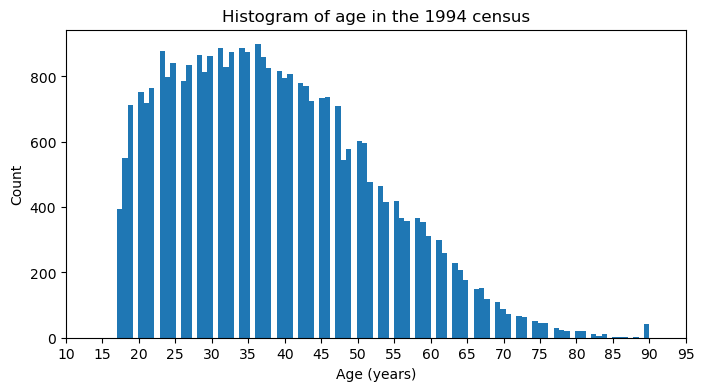

In [207]:
# Create plot

# set the plot size
plt.figure(figsize=(8, 4))

# plot the histogram
plt.hist(adult['age'], bins=100)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Histogram of age in the 1994 census')

# set the x-axis tick labels
plt.xticks(range(10,100,5))
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q5d - Visualize: Distribution: Multiple Attributes

Create an overlapping density plot for `Age` by `Income`.

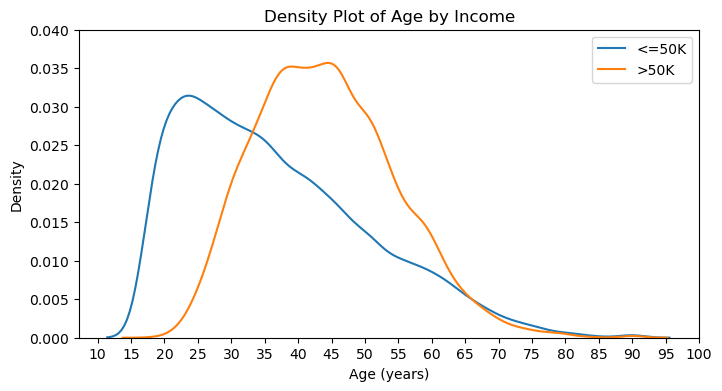

In [208]:
# Create plot

# set the plot size
plt.figure(figsize=(8, 4))

# plot the overlapping density plot
sns.kdeplot(adult.loc[adult['income'] == '<=50K', 'age'], label='<=50K')
sns.kdeplot(adult.loc[adult['income'] == '>50K', 'age'], label='>50K')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Density Plot of Age by Income')
plt.legend()

# set x-axis and y-axis tick labels
plt.xticks(range(10,105,5))
plt.yticks(np.arange(0,0.045,0.005))
plt.show()

<!-- END QUESTION -->

## Submission 

1. Make sure you have run all cells in your notebook in order, so that all images/graphs appear in the output, then save your notebook.
2. Print your notebook to a PDF
    * Using Jupyter Lab 
        * Option A:  Select "File" -> "Print ..." save as a PDF 
        In my test on my local machine with Safari and Chrome on MacOS, the resulting PDF is saved to the Downloads folder on your local machine. 
        * Option B: Select "File" -> "Save and Export Notebook as ..." -> HTML, then open HTML file in a Browser and Print to PDF  
        In my test, the resulting HTML file is saved to the Downloads folder.  Then, can print the html to a PDF using the browser. 
    * Using Jupyter notebook  
        * Select "File" -> "Download as" -> "HTML", then open HTML file in a Browser and Print to PDF  
        In my test, the resulting HTML file is saved to the Downloads folder.  Then, can print the html to a PDF using the browser. 

3. Gather the PDF and HTML together. 
4. Zip the notebook and PDF together and submit on Gradescope 